In [55]:
import os, os.path as op
import glob, shutil
import numpy as np, pandas as pd
import cProfile
import pstats
from matplotlib import colors
import seaborn as sns

%pdb off
%matplotlib inline

Automatic pdb calling has been turned OFF


## Get Profiles

In [2]:
# get paths to profiles
track   = '004'
path_wd = op.join(op.expanduser('~'), f'Virtual_Tests_{track}') 
path_profs = op.join(path_wd, 'Profiles')
print ('Profiles at:', path_profs)

Profiles at: /home/jovyan/Virtual_Tests_004/Profiles


In [3]:
monyr    = '' # Optionally filter by a mon/yr, e.g., '0417'
profiles = glob.glob(op.join(path_profs, f'{monyr}*.profile'))

In [76]:
## make a dataframe with the total time info for all exps
rows = []
for prof in profiles:
    row = op.splitext(op.basename(prof))[0].split('_')[:5]
    p = pstats.Stats(prof)
    tt = p.get_stats_profile().total_tt
    # p.sort_stats('time')
    # p.print_stats(5)
    # print (prof, f': {tt/60:.2f} min')
    row.append(tt)
    rows.append(row)
    
df_stats = pd.DataFrame(rows, columns='kind nprod gbranch monyr idx tot'.split()).set_index('idx')
df_stats

,kind,nprod,gbranch,monyr,tot
idx,,,,,
0,VIRT,18,dev,0417,732.027
1,PHYS,18,dev,0417,246.097
0,PHYS,18,dev,0417,245.636
1,VIRT,18,dev,0417,0.693


## Single Frame

In [77]:
df_stats

,kind,nprod,gbranch,monyr,tot
idx,,,,,
0,VIRT,18,dev,0417,732.027
1,PHYS,18,dev,0417,246.097
0,PHYS,18,dev,0417,245.636
1,VIRT,18,dev,0417,0.693


In [83]:
nprod = 18 # 80
df_sf = df_stats[df_stats.nprod == str(nprod)]

In [84]:
df_sf

,kind,nprod,gbranch,monyr,tot
idx,,,,,
0,VIRT,18,dev,0417,732.027
1,PHYS,18,dev,0417,246.097
0,PHYS,18,dev,0417,245.636
1,VIRT,18,dev,0417,0.693


### Virtual vs Physical, one branch

In [79]:
gbranch = 'dev'

In [85]:
df_sf_b = df_sf[df_sf.gbranch==gbranch]

In [98]:
df_sf_b['lbl']   = df_sf_b.apply(lambda x: f"{x['kind']}{x.name}", axis=1)
col_dct          = {'VIRT': 'darkblue', 'PHYS':'dimgray'}
df_sf_b['color'] =  df_sf_b['kind'].apply(lambda x: col_dct[x])

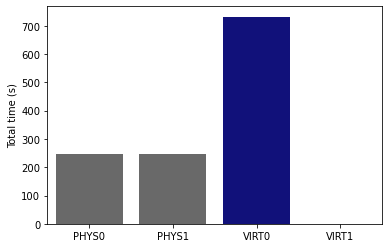

In [102]:
df_sf_b.sort_values('lbl', inplace=True)
ax = sns.barplot(x='lbl', y='tot', palette=df_sf_b['color'], data=df_sf_b)
ax.set_xlabel('')
ax.set_ylabel('Total time (s)');

### Virtual vs Physical, all branch
- todo

<AxesSubplot:xlabel='kind', ylabel='tot'>

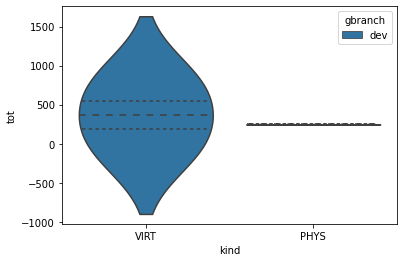

In [105]:
sns.violinplot(x='kind', y='tot', data=df_sf, hue='gbranch', inner='quartile')